# Libraries

In [1]:
import pickle
import pandas as pd
import seaborn as sns
from os.path import exists
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from textblob import TextBlob


# Loading the Files

Download the csv files into the `data/` directory.

train.csv shape is  (1697533, 9)
test.csv shape is  (212192, 2)

        Id   ProductId          UserId  HelpfulnessNumerator  \
0   914403  B0009W5KHM   AV6QDP8Q0ONK4                     2   
1   354887  6303079709  A2I8RXJN80A2D2                     0   
2  1407653  B004H0M2XC  A3FHV3RV8Z12E6                     0   
3  1377458  B003ZJ9536  A12VLTA3ZHVPUY                     1   
4   475323  630574453X  A13NM1PES9OXVN                     2   

   HelpfulnessDenominator        Time  \
0                       2  1341014400   
1                       0  1168819200   
2                       0  1386201600   
3                       1  1348704000   
4                       3   970012800   

                                         Summary  \
0                                  GOOD FUN FILM   
1                                   Movie Review   
2             When is it a good time to Consent?   
3                                          TRUTH   
4  Intelligent and bittersweet -- stays wit

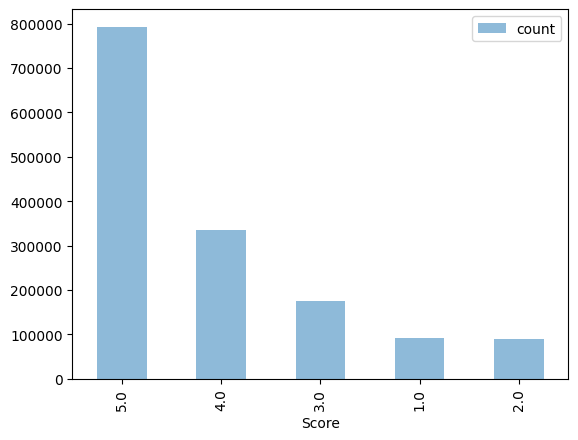


EVERYTHING IS PROPERLY SET UP! YOU ARE READY TO START


In [2]:

trainingSet = pd.read_csv("train.csv")
testingSet = pd.read_csv("test.csv")

print("train.csv shape is ", trainingSet.shape)
print("test.csv shape is ", testingSet.shape)

print()

print(trainingSet.head())
print()
print(testingSet.head())

print()

print(trainingSet.describe())

trainingSet['Score'].value_counts().plot(kind='bar', legend=True, alpha=.5)
plt.show()

print()
print("EVERYTHING IS PROPERLY SET UP! YOU ARE READY TO START")

In [3]:
'''import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Load the dataset
df = pd.read_csv('train.csv')

# Step 2: Sample only a small part of the dataset for faster cross-validation
# You can adjust frac to use a smaller fraction (e.g., 5% of the dataset)
df_sampled = df.sample(frac=0.02, random_state=42)  # Use only 5% of the data

# Step 3: Fill NaN values in the text column with empty strings
df_sampled['Text'] = df_sampled['Text'].fillna('')  # Replace 'Text' with the actual text column name
df_sampled = df_sampled.dropna(subset=['Score'])    # Drop rows where 'Score' is NaN

# Step 4: Define the text and target columns
X_text = df_sampled['Text']  # Replace 'Text' with your actual text column name
y = df_sampled['Score']      # Replace 'Score' with your actual target column name

# Step 5: TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42)

# Step 7: Model Comparison using Cross-Validation
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors (KNN)': KNeighborsClassifier(n_neighbors=5)
}

# Step 8: Iterate over each model and evaluate with cross-validation
for model_name, model in models.items():
    pipeline = make_pipeline(vectorizer, model)
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{model_name}: Average Accuracy = {scores.mean():.4f}")

# Step 9: Test the final model on the test set (replace with your best-performing model)
best_model = LogisticRegression(max_iter=1000)  # Replace with your best-performing model
pipeline = make_pipeline(vectorizer, best_model)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Step 10: Evaluate the final model on the test set
final_accuracy = accuracy_score(y_test, y_pred)
print(f"Final Accuracy on test set: {final_accuracy:.4f}")'''


'import pandas as pd\nfrom sklearn.model_selection import train_test_split, cross_val_score\nfrom sklearn.feature_extraction.text import TfidfVectorizer\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.naive_bayes import MultinomialNB\nfrom sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier\nfrom sklearn.svm import SVC\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.pipeline import make_pipeline\nfrom sklearn.metrics import accuracy_score\nfrom sklearn.neighbors import KNeighborsClassifier\n\n# Step 1: Load the dataset\ndf = pd.read_csv(\'train.csv\')\n\n# Step 2: Sample only a small part of the dataset for faster cross-validation\n# You can adjust frac to use a smaller fraction (e.g., 5% of the dataset)\ndf_sampled = df.sample(frac=0.02, random_state=42)  # Use only 5% of the data\n\n# Step 3: Fill NaN values in the text column with empty strings\ndf_sampled[\'Text\'] = df_sampled[\'Text\'].fillna(\'\')  # Replace \'Text\' with 

# Adding Features

In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
analyzer = SentimentIntensityAnalyzer()
def calculate_vader_sentiment_score(text):
    """
    Calculate the VADER sentiment score of the given text.

    :param text: The text to analyze
    :return: Sentiment polarity score ranging from -1 (negative) to 1 (positive)
    """
    if pd.notnull(text):
        sentiment_dict = analyzer.polarity_scores(str(text))
        return sentiment_dict['compound']  # Compound score ranges from -1 to 1
    else:
        return 0


In [5]:
def compute_user_rating_features(df, alpha=5):
    """
    Compute user-level features representing the likelihood of giving certain ratings.
    This function calculates the weighted user average rating and rating variability.

    :param df: DataFrame with 'UserId' and 'Score' columns
    :param alpha: Smoothing parameter for weighted average
    :return: DataFrame with user-level features
    """
    # Calculate the global average rating
    global_average = df['Score'].mean()

    # Group by UserId and calculate various user-level metrics
    user_stats = df.groupby('UserId').agg(
        user_average_rating=('Score', 'mean'),
        num_ratings=('Score', 'size'),
        rating_std_dev=('Score', 'std')
    ).reset_index()

    # Calculate the weighted user average rating
    user_stats['weighted_user_average'] = (
        (alpha * global_average + user_stats['user_average_rating'] * user_stats['num_ratings']) /
        (alpha + user_stats['num_ratings'])
    )

    # Fill NaN values for standard deviation (for users with only one rating)
    user_stats['rating_std_dev'] = user_stats['rating_std_dev'].fillna(0)

    # Create a combined feature: weighted user average + a scaled version of standard deviation
    user_stats['user_rating_tendency'] = user_stats['weighted_user_average'] + 0.5 * user_stats['rating_std_dev']

    return user_stats

In [20]:
import re
emotional_words = set([
    'love', 'hate', 'best', 'worst', 'amazing', 'awful', 'fantastic',
    'terrible', 'great', 'poor', 'excellent', 'disappointing',
    'joyful', 'sad', 'wonderful', 'horrible', 'perfect', 'bad', 'good'
    # Add more emotional or subjective words as needed
])
def count_emotional_words(text, emotional_words):
    """
    Count the number of emotional words in the given text.

    :param text: The text to analyze
    :param emotional_words: A set of emotional words to look for
    :return: The count of emotional words in the text
    """
    words = re.findall(r'\b\w+\b', str(text).lower())
    return sum(1 for word in words if word in emotional_words)


In [18]:
def load_nrc_emotion_lexicon(filepath):
    """
    Load the NRC Emotion Lexicon into a set of sentiment words.

    :param filepath: Path to the NRC Emotion Lexicon file
    :return: Set of words related to emotions
    """
    emotion_words = set()
    with open(filepath, 'r') as file:
        for line in file:
            word, emotion, association = line.strip().split('\t')
            if int(association) == 1:
                emotion_words.add(word)
    return emotion_words

# Example usage:
emotion_words = load_nrc_emotion_lexicon('NRC-Emotion-Lexicon/NRC-Emotion-Lexicon-Senselevel-v0.92.txt')

def get_frequent_words_by_star(df, emotion_words, top_n=50):
    """
    Identify the top N common words for each star rating, using a sentiment lexicon.

    :param df: DataFrame with 'Text' and 'Score' columns
    :param emotion_words: Set of words related to emotions or satisfaction
    :param top_n: Number of top words to consider for each rating
    :return: Dictionary with star ratings as keys and sets of top words as values
    """
    from collections import Counter
    import re

    # Dictionary to hold word counts per rating class
    word_counts_by_score = {1: Counter(), 2: Counter(), 3: Counter(), 4: Counter(), 5: Counter()}

    # Tokenize and update word counts for each rating class
    for _, row in df.iterrows():
        score = row['Score']
        if pd.isna(score) or score not in word_counts_by_score:
            continue

        text = str(row['Text']).lower() if pd.notnull(row['Text']) else ""
        words = re.findall(r'\b\w+\b', text)

        # Filter the words to only include those in the emotion_words list
        filtered_words = [word for word in words if word in emotion_words]

        # Update word counts for the corresponding score
        word_counts_by_score[score].update(filtered_words)

    # Get the top N most common words for each score
    top_words_by_score = {
        score: set(word for word, count in word_counts.most_common(top_n))
        for score, word_counts in word_counts_by_score.items()
    }

    return top_words_by_score


In [21]:
import re
def add_features_to(df):
    # This is where you can do all your feature extraction

    df['Helpfulness'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator']
    df['Helpfulness'] = df['Helpfulness'].fillna(0)
    df['HelpfulnessGap'] = df['HelpfulnessDenominator'] - df['HelpfulnessNumerator']
    df['HelpfulnessGap'] = df['HelpfulnessGap'].fillna(0)

    #Combined Helpfulness Rating
    a=1.0
    b=0.5
    df['CombinedHelpfulness'] = a * df['Helpfulness'] + b * df['HelpfulnessGap']
    df['CombinedHelpfulness'] = df['CombinedHelpfulness'].fillna(0)

    # Add feature for the count of emotional words
    df['EmotionalWordCount'] = df['Text'].apply(lambda x: count_emotional_words(x, emotional_words))
    df['EmotionalWordCount'] = df['EmotionalWordCount'].fillna(0)

    # User Tendency section
    alpha =5
    user_stats = compute_user_rating_features(df, alpha)
    df = pd.merge(df, user_stats[['UserId', 'weighted_user_average', 'rating_std_dev', 'user_rating_tendency']],
                  on='UserId', how='left')

    a, b, c = 1.0, 0.5, 0.5  # Weights for combining the features
    df['user_combined_rating'] = (a * df['weighted_user_average'] +
                                  b * df['rating_std_dev'] +
                                  c * df['user_rating_tendency'])

    # Sentiment Score
    df['SentimentScore'] = df['Text'].apply(calculate_vader_sentiment_score)
    df['SentimentScore'] = df['SentimentScore'].fillna(0)

    # Fill any remaining NaN values for the new features (if needed)
    df['user_combined_rating'] = df['user_combined_rating'].fillna(df['user_combined_rating'].mean())
    df['user_combined_rating'] = df['user_combined_rating'].fillna(0)

    return df


# Load the feature extracted files if they've already been generated
if exists('./data/X_train.csv'):
    X_train = pd.read_csv("./data/X_train.csv")
if exists('./data/X_submission.csv'):
    X_submission = pd.read_csv("./data/X_submission.csv")

else:
    # Process the DataFrame
    train = add_features_to(trainingSet)

    # Merge on Id so that the submission set can have feature columns as well
    X_submission = pd.merge(train, testingSet, left_on='Id', right_on='Id')
    X_submission = X_submission.drop(columns=['Score_x'])
    X_submission = X_submission.rename(columns={'Score_y': 'Score'})

    # The training set is where the score is not null
    X_train =  train[train['Score'].notnull()]

    X_submission.to_csv("./data/X_submission.csv", index=False)
    X_train.to_csv("./data/X_train.csv", index=False)

# Sample + Split into training and testing set

In [22]:
# Split training set into training and testing set
print(X_train.columns)  # Check the column names to ensure 'Score' is present

X_train, X_test, Y_train, Y_test = train_test_split(

    X_train.drop(columns=['Score']),
    X_train['Score'],
    test_size=1/4.0,
    random_state=0
)


Index(['Id', 'ProductId', 'UserId', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Time', 'Summary', 'Text', 'Score',
       'Helpfulness', 'HelpfulnessGap', 'CombinedHelpfulness',
       'EmotionalWordCount', 'weighted_user_average', 'rating_std_dev',
       'user_rating_tendency', 'user_combined_rating', 'SentimentScore'],
      dtype='object')


# Feature Selection

In [26]:
features = ['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Helpfulness', 'user_combined_rating', 'EmotionalWordCount', 'SentimentScore']

X_train_select = X_train[features]
X_test_select = X_test[features]
X_submission_select = X_submission[features]

# Model Creation

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create the Gradient Boosting model
model = GradientBoostingClassifier(
    n_estimators=100,    # Number of boosting stages to be run
    learning_rate=0.1,   # Step size shrinkage used in updates to prevent overfitting
    max_depth=3,         # Maximum depth of each tree
    random_state=0       # Seed for reproducibility
)

# Train the model on the training data
model.fit(X_train_select, Y_train)

# Make predictions on the test data
Y_test_predictions = model.predict(X_test_select)

# Model Evaluation

Accuracy on testing set =  0.5569888187517504


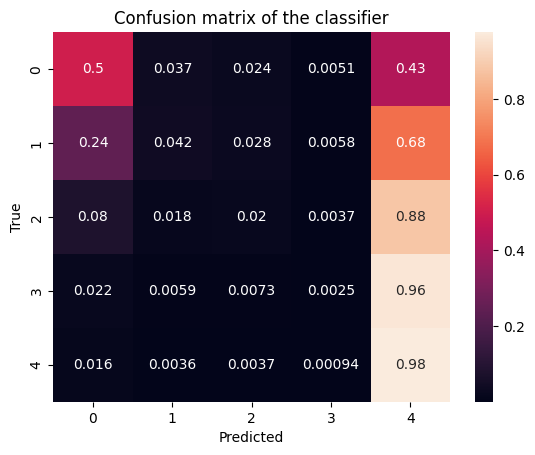

In [25]:
# Evaluate your model on the testing set
print("Accuracy on testing set = ", accuracy_score(Y_test, Y_test_predictions))

# Plot a confusion matrix
cm = confusion_matrix(Y_test, Y_test_predictions, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
#0.601845767714415

# Create submission file

In [13]:
# Create the submission file
X_submission['Score'] = model.predict(X_submission_select)
submission = X_submission[['Id', 'Score']]
print(submission.shape)  # Should be (212192, number_of_columns)

assert submission.shape[0] == 212192, "Error: submission.csv does not have 212192 rows"

submission.to_csv("./data/submission.csv", index=False)

(212192, 2)
